# Histogram Equalization

#### Implement histogram equalization and apply to image crowd.png, which you will find uploaded on NYUClasses

    Author: Pruthviraj R Patil
    NYU ID: N16324281

In [1]:
import numpy as np
import cv2
import matplotlib.pyplot as plt

In [48]:
#read image using path
def read_img(path):
    #status:complete
    img=cv2.imread(path)
    img_gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    img_gray = ((img_gray - np.min(img_gray)) * (1/(np.max(img_gray) - np.min(img_gray)) * 255)).astype('uint8')
    return img_gray

In [49]:
# Create normalized intensity histogram from an input image
def create_pdf(im_in):
    #status:complete
    pdf=np.zeros(256)
    m=im_in.shape[0]
    n=im_in.shape[1]
    for i in range(m):
        for j in range(n):
            pdf[im_in[i][j]]+=1/(m*n)
    return pdf

In [50]:
# Create the cumulative distribution function from an input pdf
def create_cdf(pdf):
    #status:complete
    cdf=np.zeros(256)
    sums=0.0
    for i in range(256):
        sums+=pdf[i]
        cdf[i]=sums
    return cdf

In [51]:
# Create a histogram equalized image using your computed cdf
def histogram_equalization(im_in):
    #status:complete
    pdf = create_pdf(im_in) # previously implemented function
    cdf = create_cdf(pdf) # previously implemented function
    m=im_in.shape[0]
    n=im_in.shape[1]
    equalized_im=np.zeros((m, n))
    for i in range(m):
        for j in range(n):
            equalized_im[i][j]=cdf[im_in[i][j]]
    return equalized_im

In [52]:
#convert image to image with unsigned int clipped to 255 intensity
def convert_img_uint(img):
    #status:complete
    img = ((img - np.min(img)) * (1/(np.max(img) - np.min(img)) * 255)).astype('uint8')
    return img

In [53]:
#to juxtapose original image and final equalized image
def show_img_and_hist(img, name):
    #status:complete
    fig, ax= plt.subplots(nrows=1, ncols=2, figsize=(15, 5))
    ax[0].imshow(img, cmap="gray")
    ax[0].set_title(name)
    ax[0].set_xlabel("Intensities bin")
    ax[0].set_ylabel("Probabilities of frequencies")
    
    ax[1].bar(np.arange(256), create_pdf(img))
    ax[1].set_title("Histogram of "+name)
    ax[1].set_xlabel("Intensities bin")
    ax[1].set_ylabel("Probabilities of frequencies")

In [102]:
def main():
    #status:complete
    path='C:\\Users\\pruth\\Desktop\\NYU\\Year-1\\Spring\\CV\\Assignments_notebooks\\q1b.png'
    img=read_img(path)
    equalized_im=histogram_equalization(img)
    equalized_im = convert_img_uint(equalized_im)
    show_img_and_hist(img, "Original Image")
    show_img_and_hist(equalized_im, "Output after Histogram Equalization")
    
    #reapplying the Histogram equalization for the corrected image.
    re_equalized_im=histogram_equalization(equalized_im)
    show_img_and_hist(equalized_im, "Equalized Image")
    re_equalized_im = convert_img_uint(re_equalized_im)
    show_img_and_hist(re_equalized_im, "Output after Repeating Equalization")
    
    
    #applying the Histogram equalization over a low contrast image.
#     path_new_img='C:\\Users\\pruth\\Desktop\\NYU\\Year-1\\Spring\\CV\\low_contrast_img.png'
#     lc_img=read_img(path_new_img)
#     equalized_im_lc=histogram_equalization(lc_img)
#     equalized_im_lc= convert_img_uint(equalized_im_lc)
#     show_img_and_hist(lc_img, "Original Image")
#     show_img_and_hist(equalized_im_lc, "Output after Histogram Equalization")

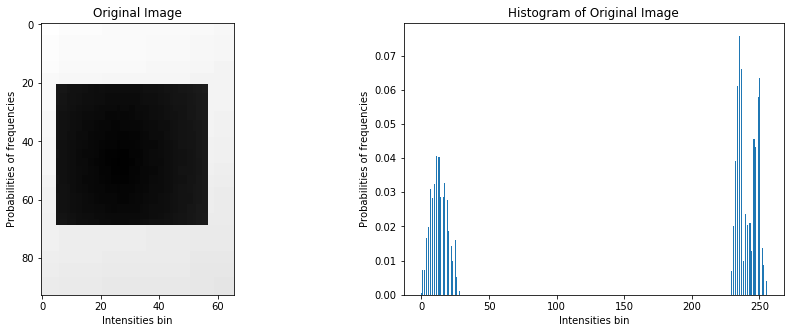

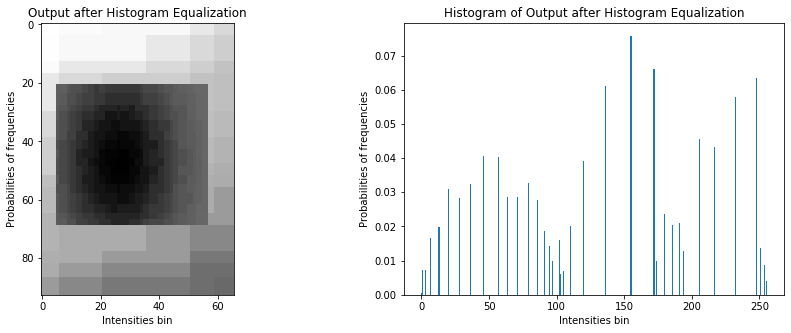

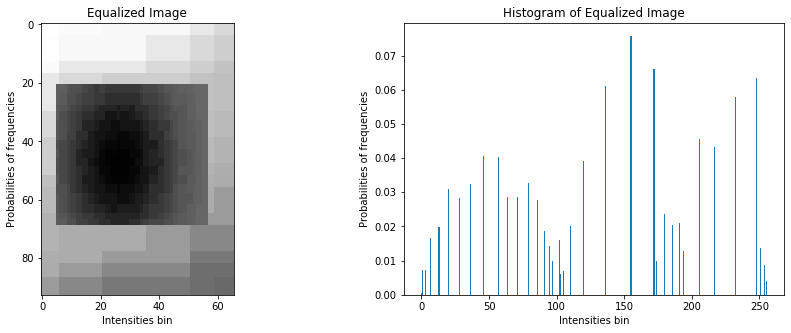

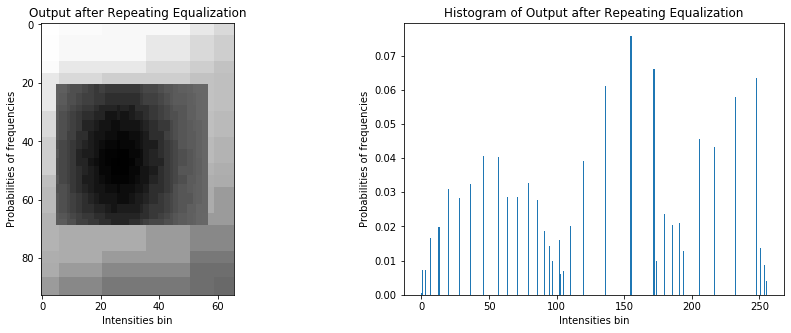

In [103]:
if __name__ == "__main__":
    main()

Text(0, 0.5, 'Cumulative Sum')

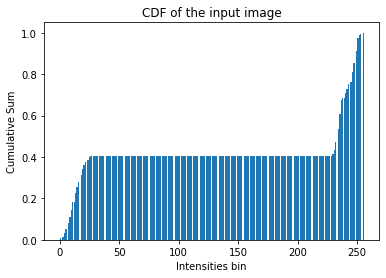

In [104]:
path='C:\\Users\\pruth\\Desktop\\NYU\\Year-1\\Spring\\CV\\Assignments_notebooks\\q1b.png'
img=read_img(path)
pdf=create_pdf(img)
cdf=create_cdf(pdf)
plt.bar(np.arange(256), cdf)
plt.title("CDF of the input image")
plt.xlabel("Intensities bin")
plt.ylabel("Cumulative Sum")

In [78]:
equalized_im=histogram_equalization(img)
equalized_im = convert_img_uint(equalized_im)

In [ ]:
pdf_eq=create_pdf(equalized_im)
cdf_eq=create_cdf(pdf_eq)
plt.bar(np.arange(256), cdf_eq)
plt.title("CDF of the output image")
plt.xlabel("Intensities bin")
plt.ylabel("Cumulative Sum")